In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/udothemath1984/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('input/portland-oregon-average-monthly-.csv', index_col=0)
df.index.name=None
df.reset_index(inplace=True)
df.drop(df.index[114], inplace=True)

In [3]:
print(df.index)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            104, 105, 106, 107, 108, 109, 110, 111, 112, 113],
           dtype='int64', length=114)


In [4]:
print(df.tail(4))

       index  \
110  1969-03   
111  1969-04   
112  1969-05   
113  1969-06   

    Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114  
110                                               1419                                          
111                                               1432                                          
112                                               1394                                          
113                                               1327                                          


In [5]:
start = datetime.datetime.strptime("1973-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,114)]
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None

In [6]:
print(df.head(3))

           Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114
1973-01-01                                                648                                        
1973-02-01                                                646                                        
1973-03-01                                                639                                        


In [7]:
df.columns = ['riders']
df['riders'] = df.riders.apply(lambda x: int(x)*100)

In [8]:
print(df.head(3))

            riders
1973-01-01   64800
1973-02-01   64600
1973-03-01   63900


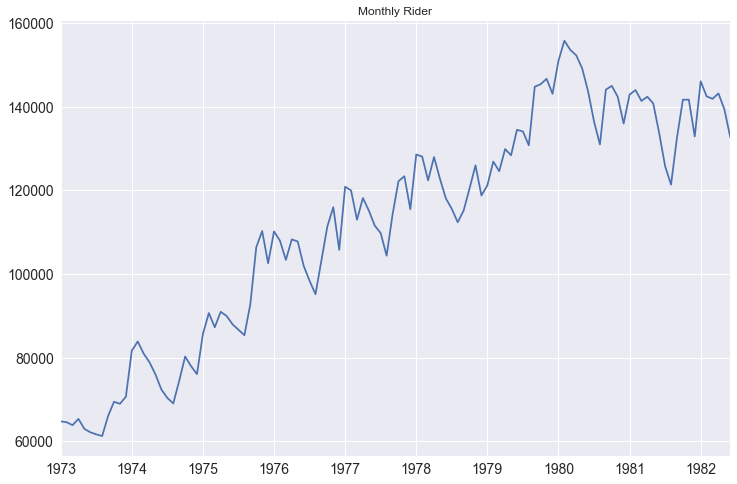

In [9]:
df.riders.plot(figsize=(12, 8), title='Monthly Rider', fontsize=14)
plt.savefig('month_rider.png', bbox_inches='tight')

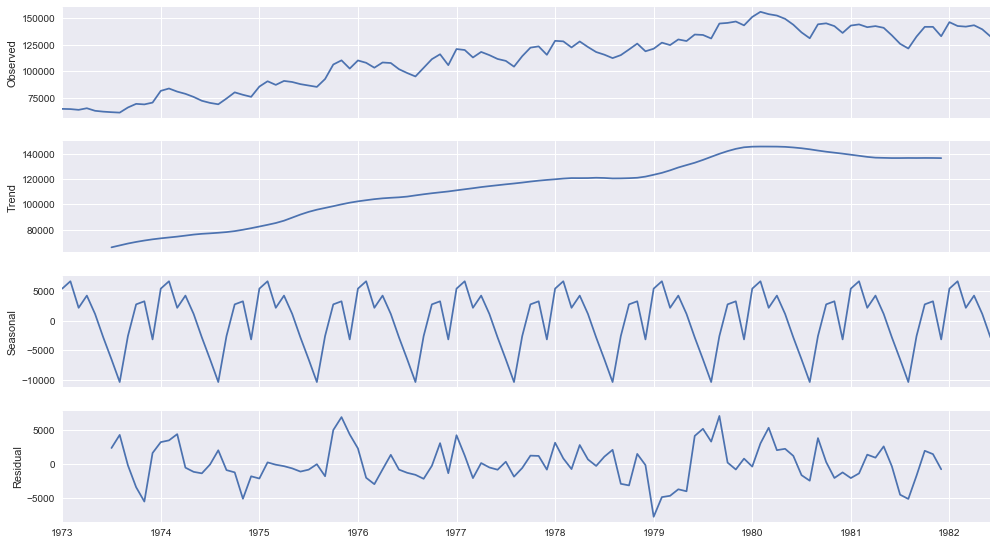

In [10]:
decomposition = seasonal_decompose(df.riders, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [37]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, print_this=True):
    ## Determing rolling stats
    ## deprecated
    ## rolmean = pd.rolling_mean(timeseries, window= 12)
    ## rolstd = pd.rolling_std(timeseries, window= 12)
    
    rolmean = timeseries.rolling(window=12,center=False).mean() 
    rolstd = timeseries.rolling(window=12,center=False).std()

    if print_this:
        ## Plot rolling stats
        fig = plt.figure(figsize=(12, 8))
        orig = plt.plot(timeseries, color='blue', label= 'Original')
        mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
        std = plt.plot(rolstd, color= 'black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show()
    
    ## Perforom Dickey-Fuller test:
    print ("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({:s})'.format(key)] = value
    print(dfoutput)

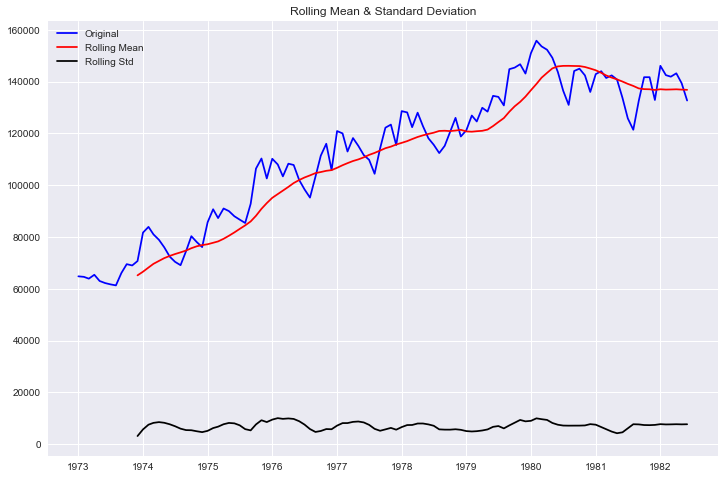

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [38]:
test_stationarity(df.riders)


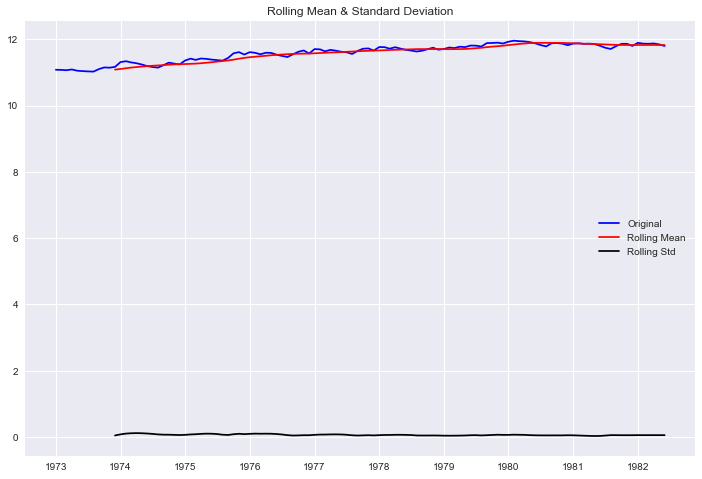

Results of Dickey-Fuller Test:
Test Statistic                  -1.677830
p-value                          0.442570
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [49]:
df.riders_log = df.riders.apply(lambda x: np.log(x))
test_stationarity(df.riders_log)

In [46]:
df['first_diff'] = df.riders - df.riders.shift(1)
print(df.riders.head(2) )
print(df.riders.shift(1).head(2))

1973-01-01    64800
1973-02-01    64600
Name: riders, dtype: int64
1973-01-01        NaN
1973-02-01    64800.0
Name: riders, dtype: float64


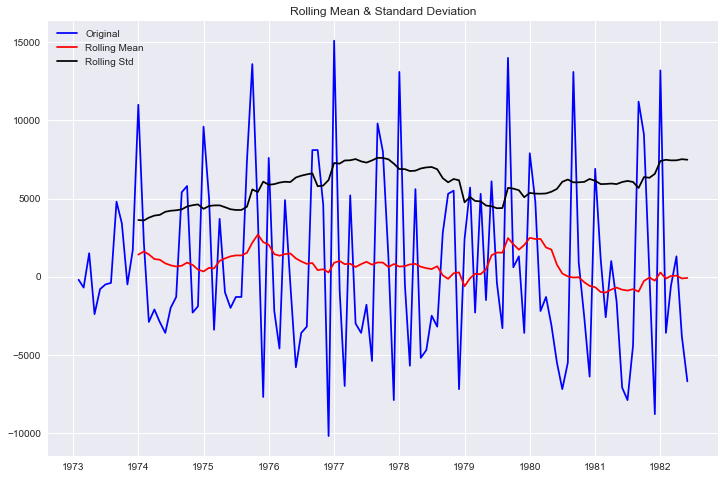

Results of Dickey-Fuller Test:
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [47]:
test_stationarity(df.first_diff.dropna(inplace=False))

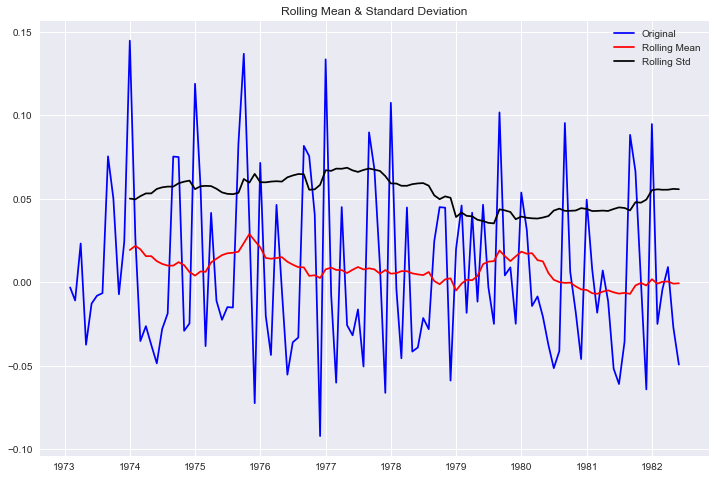

Results of Dickey-Fuller Test:
Test Statistic                  -2.047539
p-value                          0.266126
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [52]:
df['log_first_difference'] = df.riders_log - df.riders_log.shift(1)  
test_stationarity(df.log_first_difference.dropna(inplace=False))


### Seasonal Diff ###

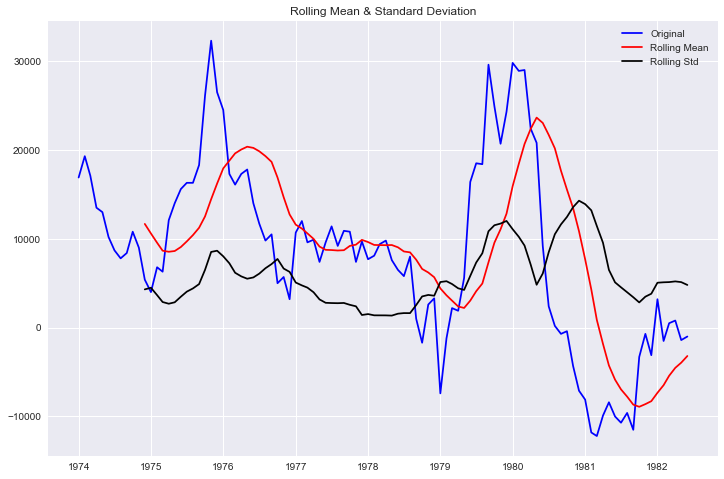

Results of Dickey-Fuller Test:
Test Statistic                 -2.469741
p-value                         0.123011
#Lags Used                      3.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


In [50]:
df['seasonal_diff'] = df.riders - df.riders.shift(12)
test_stationarity(df.seasonal_diff.dropna(inplace=False))

### Seasonal Log Diff ###

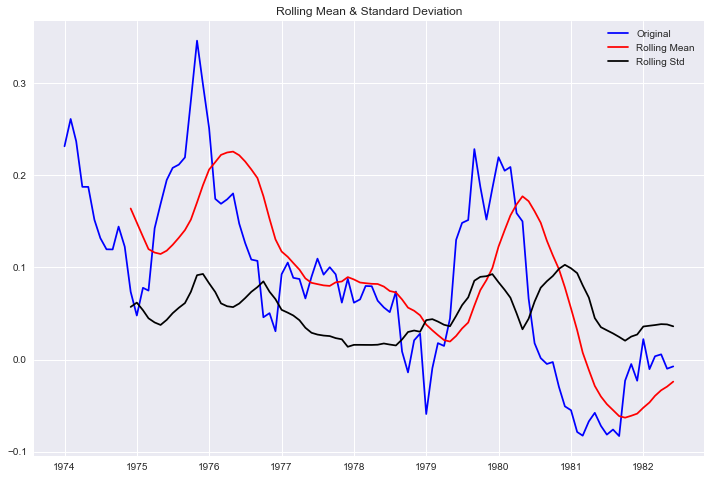

Results of Dickey-Fuller Test:
Test Statistic                  -1.919681
p-value                          0.322860
#Lags Used                       0.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [51]:
df['log_seasonal_difference'] = df.riders_log - df.riders_log.shift(12)  
test_stationarity(df.log_seasonal_difference.dropna(inplace=False))

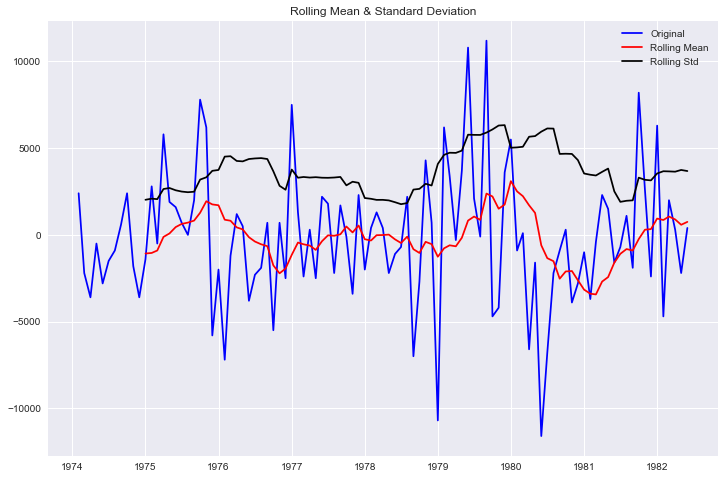

Results of Dickey-Fuller Test:
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [54]:
df['seasonal_first_difference'] = df.first_diff - df.first_diff.shift(12)  
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))

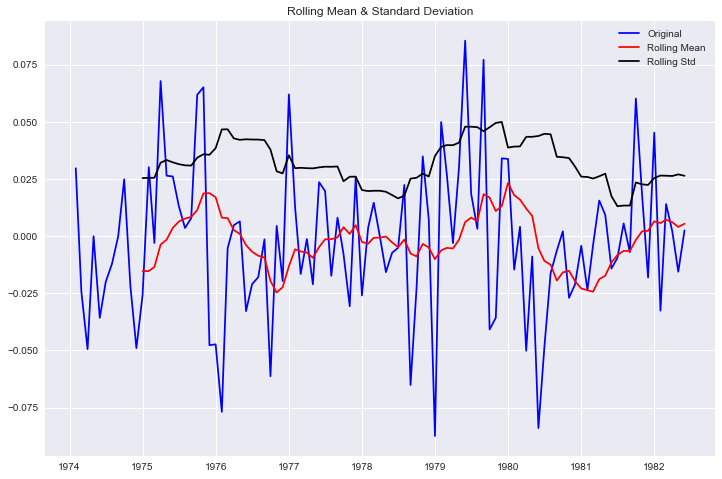

Results of Dickey-Fuller Test:
Test Statistic                -8.882112e+00
p-value                        1.309452e-14
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [55]:
df['log_seasonal_first_difference'] = df.log_first_difference - df.log_first_difference.shift(12)
test_stationarity(df.log_seasonal_first_difference.dropna(inplace=False))

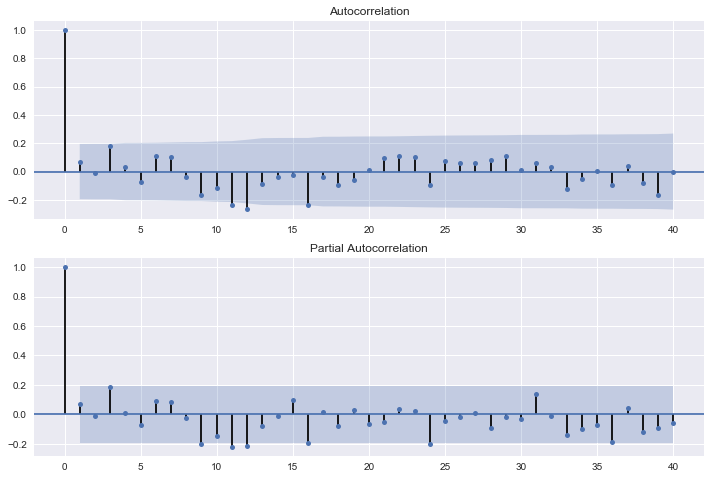

In [57]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags = 40, ax= ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:], lags = 40, ax= ax2)

In [58]:
mod = sm.tsa.statespace.SARIMAX(df.riders, trend='n', order=(0, 1, 0), seasonal_order = (0, 1, 1, 12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                             riders   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                -976.135
Date:                            Thu, 23 Nov 2017   AIC                           1956.271
Time:                                    17:50:46   BIC                           1961.743
Sample:                                01-01-1973   HQIC                          1958.492
                                     - 06-01-1982                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.1377      0.050     -2.757      0.006      -0.236      -0.040
sigma2      1.424e+07   2.62e-10   

In [60]:
mod = sm.tsa.statespace.SARIMAX(df.riders, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                             riders   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -970.257
Date:                            Thu, 23 Nov 2017   AIC                           1946.514
Time:                                    17:52:19   BIC                           1954.723
Sample:                                01-01-1973   HQIC                          1949.845
                                     - 06-01-1982                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5591      0.084      6.679      0.000       0.395       0.723
ma.S.L12      -0.9985      0.116   